Firstly , we will download the dataset.


In [ ]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

--2021-04-08 10:25:23--  https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60999314 (58M) [application/x-httpd-php]
Saving to: ‘UCI HAR Dataset.zip’

UCI HAR Dataset.zip 100%[===================>]  58.17M  32.1MB/s    in 1.8s    

2021-04-08 10:25:26 (32.1 MB/s) - ‘UCI HAR Dataset.zip’ saved [60999314/60999314]



In [ ]:
#unzip it
!unzip "UCI HAR Dataset.zip"

Archive:  UCI HAR Dataset.zip
   creating: UCI HAR Dataset/
  inflating: UCI HAR Dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/UCI HAR Dataset/
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features.txt  
  inflating: UCI HAR Dataset/features_info.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features_info.txt  
  inflating: UCI HAR Dataset/README.txt  
  inflating: __MACOSX/UCI HAR Dataset/._README.txt  
   creating: UCI HAR Dataset/test/
   creating: UCI HAR Dataset/test/Inertial Signals/
  inflating: UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt  
   creating: __MACOSX/UCI HAR Dataset/test/
   creating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/
  inflating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/._body_acc_x_test.txt  
  inflating: UCI HAR

In [ ]:
#moving it into our current working directory
!mv "UCI HAR Dataset" HARDataset/

In [ ]:
from numpy import std
from numpy import dstack
from pandas import read_csv

Here we will try to load a group of files, such as all of the body acceleration data files as a single group.


In [ ]:
# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values
 
# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded
 
# load the total acc data
filenames = ['total_acc_x_train.txt', 'total_acc_y_train.txt', 'total_acc_z_train.txt']
total_acc = load_group(filenames, prefix='HARDataset/train/Inertial Signals/')
print(total_acc.shape)

(7352, 128, 3)


In [ ]:
# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values
 
# load a list of files, such as x, y, z data for a given variable
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded
 
# load a dataset group, such as train or test
def load_dataset(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# load all train
trainX, trainy = load_dataset('train', 'HARDataset/')
print(trainX.shape, trainy.shape)
# load all test
testX, testy = load_dataset('test', 'HARDataset/')
print(testX.shape, testy.shape)

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)


In [ ]:
testr = testy
trainr = trainy

In [ ]:
testr = testr-1

In [ ]:
from keras.utils import np_utils

In [ ]:
# zero-offset class values
testy = testy - 1
trainy = trainy - 1

In [ ]:
#one hot encoding
testy = np_utils.to_categorical(testy)
testy.shape

(2947, 6)

In [ ]:
#one hot encoding
trainy = np_utils.to_categorical(trainy)
trainy.shape

(7352, 6)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
import numpy as np


# **RNN model**


In [ ]:
from keras.layers import SimpleRNN

In [ ]:
#building a RNN 
#model creation
modelrnn = Sequential()
modelrnn.add(SimpleRNN(units = 128,input_shape=(128,9)))
modelrnn.add(Dense(units = 64, activation='relu'))
modelrnn.add(Dense(units = 6 , activation='sigmoid'))

In [ ]:
modelrnn.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 128)               17664     
_________________________________________________________________
dense_55 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_56 (Dense)             (None, 6)                 390       
Total params: 26,310
Trainable params: 26,310
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile model
modelrnn.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fitting model
history=modelrnn.fit(trainX,trainy,epochs=20,validation_data=(testX,testy))

Epoch 1/20
230/230 [==============================] - 11s 42ms/step - loss: 1.3438 - accuracy: 0.4393 - val_loss: 1.3483 - val_accuracy: 0.4421
Epoch 2/20
230/230 [==============================] - 9s 41ms/step - loss: 1.1579 - accuracy: 0.4996 - val_loss: 1.1793 - val_accuracy: 0.4941
Epoch 3/20
230/230 [==============================] - 9s 41ms/step - loss: 1.1538 - accuracy: 0.4915 - val_loss: 1.1811 - val_accuracy: 0.5168
Epoch 4/20
230/230 [==============================] - 9s 41ms/step - loss: 0.9926 - accuracy: 0.5788 - val_loss: 1.0772 - val_accuracy: 0.5867
Epoch 5/20
230/230 [==============================] - 9s 41ms/step - loss: 0.8453 - accuracy: 0.6476 - val_loss: 0.7435 - val_accuracy: 0.7248
Epoch 6/20
230/230 [==============================] - 10s 43ms/step - loss: 0.7289 - accuracy: 0.6920 - val_loss: 0.6721 - val_accuracy: 0.7299
Epoch 7/20
230/230 [==============================] - 9s 41ms/step - loss: 0.5524 - accuracy: 0.7743 - val_loss: 0.6441 - val_accuracy: 0.73

In [ ]:
modelrnn.evaluate(testX, testy)

93/93 [==============================] - 1s 14ms/step - loss: 0.6740 - accuracy: 0.7095


[0.6740157008171082, 0.7095351219177246]

In [ ]:
r_pred = modelrnn.predict_classes(testX)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# Confusion Matrix

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6526f85b50>)

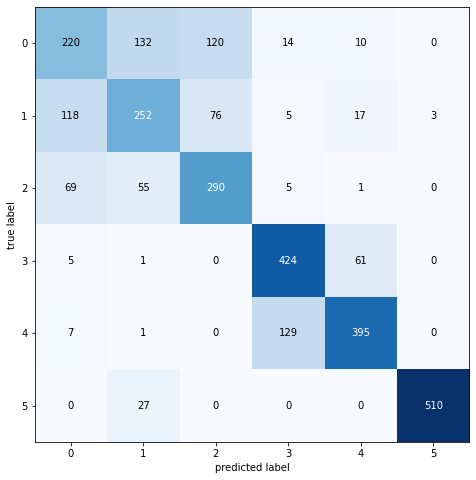

In [ ]:
mat = confusion_matrix(testr , r_pred)
plot_confusion_matrix(conf_mat = mat, show_normed=False , figsize=(10,8))

# Plotting Curves for Accuracy and Loss

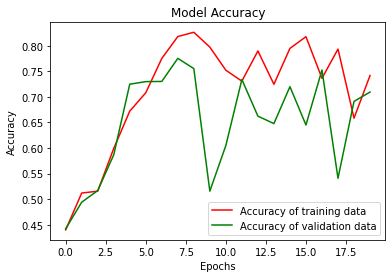

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'],'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'],'g', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

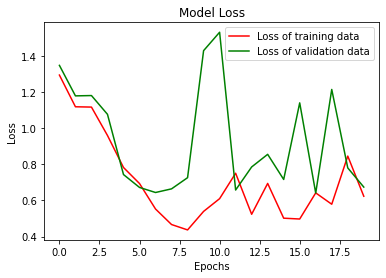

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'],'r', label='Loss of training data')
plt.plot(history.history['val_loss'],'g', label='Loss of validation data')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = modelrnn.predict(testX)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('\nClassification Report\n')
print(classification_report(testr, y_pred_classes, target_names=["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]))
#here we needed testr not testy


Classification Report

                    precision    recall  f1-score   support

           WALKING       0.53      0.44      0.48       496
  WALKING_UPSTAIRS       0.54      0.54      0.54       471
WALKING_DOWNSTAIRS       0.60      0.69      0.64       420
           SITTING       0.73      0.86      0.79       491
          STANDING       0.82      0.74      0.78       532
            LAYING       0.99      0.95      0.97       537

          accuracy                           0.71      2947
         macro avg       0.70      0.70      0.70      2947
      weighted avg       0.71      0.71      0.71      2947



## We can see RNN model gives an accuracy of 71%

# **LSTM model**

In [ ]:
from keras.layers import LSTM

In [ ]:
#building a LSTM
#model creation
modellstm = Sequential()
modellstm.add(LSTM(units = 128,input_shape=(trainX.shape[1:]),return_sequences=True))
modellstm.add(LSTM(units = 64))
modellstm.add(Dense(units = 64, activation='relu'))
modellstm.add(Dense(units = 6 , activation='sigmoid'))

In [ ]:
modellstm.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
modellstm.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 128, 128)          70656     
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_51 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_52 (Dense)             (None, 6)                 390       
Total params: 124,614
Trainable params: 124,614
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyy=modellstm.fit(trainX,trainy,epochs=20,validation_data=(testX,testy))

Epoch 1/20
230/230 [==============================] - 56s 229ms/step - loss: 1.1134 - accuracy: 0.5284 - val_loss: 0.7851 - val_accuracy: 0.7204
Epoch 2/20
230/230 [==============================] - 52s 226ms/step - loss: 0.5951 - accuracy: 0.7572 - val_loss: 0.4933 - val_accuracy: 0.7917
Epoch 3/20
230/230 [==============================] - 52s 224ms/step - loss: 0.2953 - accuracy: 0.8872 - val_loss: 0.4293 - val_accuracy: 0.8510
Epoch 4/20
230/230 [==============================] - 52s 225ms/step - loss: 0.1844 - accuracy: 0.9336 - val_loss: 0.2836 - val_accuracy: 0.8924
Epoch 5/20
230/230 [==============================] - 53s 229ms/step - loss: 0.1468 - accuracy: 0.9439 - val_loss: 0.3135 - val_accuracy: 0.8965
Epoch 6/20
230/230 [==============================] - 52s 226ms/step - loss: 0.1481 - accuracy: 0.9431 - val_loss: 0.3150 - val_accuracy: 0.8999
Epoch 7/20
230/230 [==============================] - 51s 223ms/step - loss: 0.1139 - accuracy: 0.9555 - val_loss: 0.3881 - val_ac

In [ ]:
modellstm.evaluate(testX, testy)

93/93 [==============================] - 6s 61ms/step - loss: 0.3191 - accuracy: 0.9186


[0.3190981447696686, 0.9185612201690674]

In [ ]:
r_pred = modellstm.predict_classes(testX)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# Confusion Matrix

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f652758f0d0>)

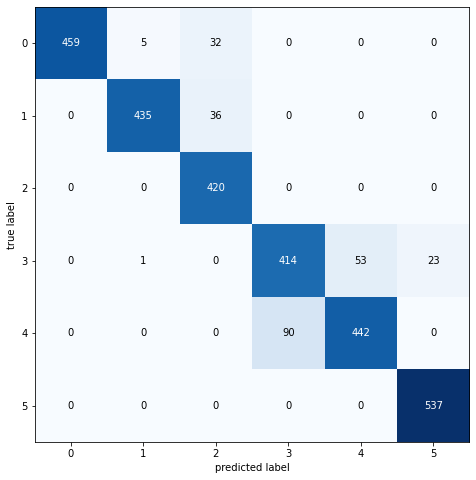

In [ ]:
mat = confusion_matrix(testr , r_pred)
plot_confusion_matrix(conf_mat = mat, show_normed=False , figsize=(10,8))


# Plotting Curves for Accuracy and Loss

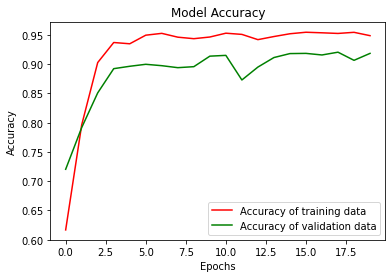

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(historyy.history['accuracy'],'r', label='Accuracy of training data')
plt.plot(historyy.history['val_accuracy'],'g', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

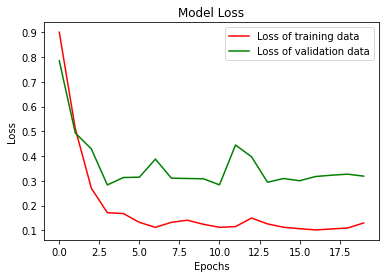

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(historyy.history['loss'],'r', label='Loss of training data')
plt.plot(historyy.history['val_loss'],'g', label='Loss of validation data')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = modellstm.predict(testX)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('\nClassification Report\n')
print(classification_report(testr, y_pred_classes, target_names=["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]))
#here we needed testr not testy


Classification Report

                    precision    recall  f1-score   support

           WALKING       1.00      0.93      0.96       496
  WALKING_UPSTAIRS       0.99      0.92      0.95       471
WALKING_DOWNSTAIRS       0.86      1.00      0.93       420
           SITTING       0.82      0.84      0.83       491
          STANDING       0.89      0.83      0.86       532
            LAYING       0.96      1.00      0.98       537

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947



# We can see LSTM model gives an accuracy of 92%
Therefore we can say LSTM works well on time-series data.

# **GRU Model**

In [ ]:
from keras.layers import GRU

In [ ]:
#building a GRU
#model creation
modelgru = Sequential()
modelgru.add(GRU(units = 128,input_shape=(trainX.shape[1:]),return_sequences=True))
modelgru.add(GRU(units = 64))
modelgru.add(Dense(units = 64, activation='relu'))
modelgru.add(Dense(units = 6 , activation='sigmoid'))

In [ ]:
modelgru.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
modelgru.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 128, 128)          53376     
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                37248     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 390       
Total params: 95,174
Trainable params: 95,174
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=modelgru.fit(trainX,trainy,epochs=20,validation_data=(testX,testy))

Epoch 1/20
230/230 [==============================] - 44s 176ms/step - loss: 1.1938 - accuracy: 0.5209 - val_loss: 0.5492 - val_accuracy: 0.7872
Epoch 2/20
230/230 [==============================] - 40s 174ms/step - loss: 0.2574 - accuracy: 0.9138 - val_loss: 0.3543 - val_accuracy: 0.8731
Epoch 3/20
230/230 [==============================] - 40s 174ms/step - loss: 0.1553 - accuracy: 0.9374 - val_loss: 0.2929 - val_accuracy: 0.8982
Epoch 4/20
230/230 [==============================] - 40s 172ms/step - loss: 0.1306 - accuracy: 0.9453 - val_loss: 0.3144 - val_accuracy: 0.9057
Epoch 5/20
230/230 [==============================] - 40s 173ms/step - loss: 0.1307 - accuracy: 0.9417 - val_loss: 0.3217 - val_accuracy: 0.8918
Epoch 6/20
230/230 [==============================] - 40s 174ms/step - loss: 0.1466 - accuracy: 0.9387 - val_loss: 0.3051 - val_accuracy: 0.9080
Epoch 7/20
230/230 [==============================] - 40s 175ms/step - loss: 0.1183 - accuracy: 0.9556 - val_loss: 0.3143 - val_ac

In [ ]:
modelgru.evaluate(testX, testy)

93/93 [==============================] - 4s 42ms/step - loss: 0.3252 - accuracy: 0.9030


[0.32515692710876465, 0.9029521346092224]

In [ ]:
r_pred = modelgru.predict_classes(testX)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


# Confusion Matrix

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f68d5e09590>)

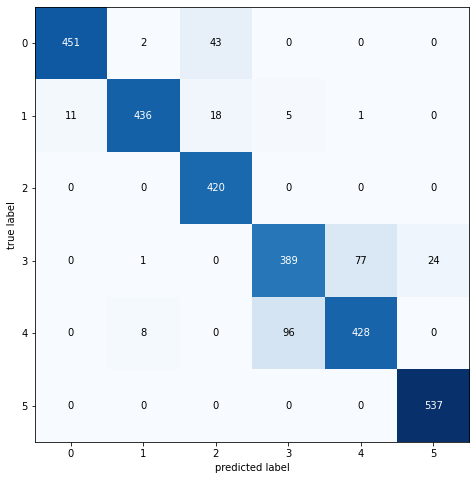

In [ ]:
mat = confusion_matrix(testr , r_pred)
plot_confusion_matrix(conf_mat = mat, show_normed=False , figsize=(10,8))

# Plotting Curves for Accuracy and Loss

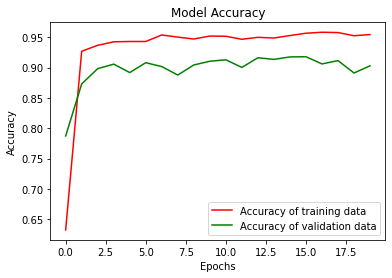

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'],'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'],'g', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

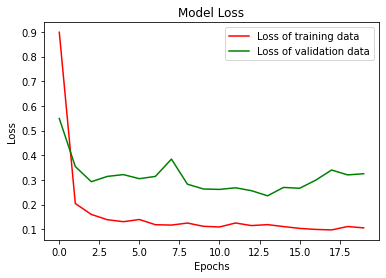

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'],'r', label='Loss of training data')
plt.plot(history.history['val_loss'],'g', label='Loss of validation data')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Classification Report

In [ ]:
from sklearn.metrics import classification_report
y_pred = modelgru.predict(testX)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('\nClassification Report\n')
print(classification_report(testr, y_pred_classes, target_names=["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]))
#here we needed testr not testy


Classification Report

                    precision    recall  f1-score   support

           WALKING       0.98      0.91      0.94       496
  WALKING_UPSTAIRS       0.98      0.93      0.95       471
WALKING_DOWNSTAIRS       0.87      1.00      0.93       420
           SITTING       0.79      0.79      0.79       491
          STANDING       0.85      0.80      0.82       532
            LAYING       0.96      1.00      0.98       537

          accuracy                           0.90      2947
         macro avg       0.90      0.91      0.90      2947
      weighted avg       0.90      0.90      0.90      2947



# GRU model gives an accuracy of 90%